Need to read dcm files: 
* https://pyscience.wordpress.com/2014/09/08/dicom-in-python-importing-medical-image-data-into-numpy-with-pydicom-and-vtk/
* https://medium.com/coinmonks/visualizing-brain-imaging-data-fmri-with-python-e1d0358d9dba
* https://www.raddq.com/dicom-processing-segmentation-visualization-in-python/

### Libraries for processing

* https://fmriprep.readthedocs.io/en/stable/
* http://nipy.org/nibabel/reference/nibabel.nicom.html#module-nibabel.nicom

#### use this pre-trained model: https://github.com/josedolz/LiviaNET
https://github.com/ehosseiniasl/3d-convolutional-network: On AD > the best if you can get the weights!!
* BRATS challenge: https://github.com/taigw/brats17

In [1]:
import numpy as np
import pandas as pd
import ntpath
import os
import matplotlib.pyplot as plt
% matplotlib inline
import pydicom
import nibabel

### paths

In [2]:
path_preprocessing='/Users/alicemartin/02_DSR_Project/parkinson-disease-project/output/pre-processing'
MRI_csv=path_preprocessing+'/MRI_processed.csv'
MRIinfo_csv=path_preprocessing+'/MRIINFO_processed.csv'
path_dcm='/Users/alicemartin/02_DSR_Project/00-PPMI-final-dataset-382018/fMRI_data/PPMI'
DCM3108=path_dcm+'/3108/ep2d_RESTING_STATE/2015-05-06_09_33_18.0/S264302'
path_nii='/Users/alicemartin/02_DSR_Project/00-PPMI-final-dataset-382018/fMRI_data/PPMI-nii-format'
nii3108_V1=path_nii+'/3108/ep2d_RESTING_STATE/2013-04-24_10_04_37.0/S193436'

## I. Metadata from csv files

In [3]:
MRI=pd.read_csv(MRI_csv)
MRI.drop(columns='Unnamed: 0',inplace=True)
MRI3108=MRI[MRI['PATNO']==3108]
MRI3108=MRI3108[MRI3108['EVENT_ID'].isin(['V06','V10'])]
MRI3108
# MRIWDTI=DTI MRI Scan
# MRIWRSS= MRI with resting state sequences

,REC_ID,PATNO,EVENT_ID,PAG_NAME,INFODT,MRICMPLT,MRIWDTI,MRIWRSS,MRIRSLT,PDMEDYN,ONLDOPA,ONDOPAG
837,396666301,3108,V06,MRI,04/2013,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1362,522558701,3108,V10,MRI,05/2015,1.0,1.0,1.0,0.0,0.0,0.0,0.0


In [4]:
MRIINFO=pd.read_csv(MRIinfo_csv)
MRIINFO.drop(columns='Unnamed: 0',inplace=True)
MRIINFO[MRIINFO['study_subject_id']==3108]
MRI3108INFO=MRIINFO[MRIINFO['study_subject_id']==3108]
MRI3108INFO=MRI3108INFO[MRI3108INFO['11a_rs_mri_E1_C4']=='Yes']
MRI3108INFO

,study_subject_id,11_scan_acquisition_date_mr_E1_C3,12_scan_quality_rating_mr_E1_C3,13_dti_sequences_E1_C3,11a_rs_mri_E1_C4,comment_E1_C7,other_E1_C7
190,3108,04/2013,1.0,Yes,Yes,NaN,NaN
191,3108,05/2015,1.0,Yes,Yes,NaN,NaN


## II. nii format

### reading with nibabel

In [5]:
# Find all files in the structural data folder
import nibabel as nib
Pathnii=nii3108_V1
lstFilesnii = []  # create an empty list
for dirName, subdirList, fileList in os.walk(Pathnii):
    for filename in fileList:
        if ".nii" in filename.lower():  # check whether the file's DICOM
            lstFilesnii.append(os.path.join(dirName,filename))
lstFilesnii[:2]

['/Users/alicemartin/02_DSR_Project/00-PPMI-final-dataset-382018/fMRI_data/PPMI-nii-format/3108/ep2d_RESTING_STATE/2013-04-24_10_04_37.0/S193436/PPMI_3108_MR_ep2d_RESTING_STATE_br_raw_20130626150623832_172_S193436_I378223.nii',
 '/Users/alicemartin/02_DSR_Project/00-PPMI-final-dataset-382018/fMRI_data/PPMI-nii-format/3108/ep2d_RESTING_STATE/2013-04-24_10_04_37.0/S193436/PPMI_3108_MR_ep2d_RESTING_STATE_br_raw_20130626150638745_15_S193436_I378223.nii']

In [6]:
# Load Timeserie 1
img3108=nib.load(lstFilesnii[0])
# Get the array proxy
arrayproxy=img3108.dataobj
# Get the header
header=img3108.header
# Get the data shape
shape=header.get_data_shape()
# get the 4d-array
np_array=img3108.get_fdata()
shape[:3]
np_array=np_array.squeeze()
np_array.shape

(68, 66, 40)

#### important: saving time and memory when having each 4d-numpy array: http://nipy.org/nibabel/images_and_memory.html

### Plot with nibabel:

In [7]:
np_array_list = [nib.load(x).get_fdata().squeeze() for x in lstFilesnii]
array_4D_3108=np.asarray(np_array_list)

In [8]:
array_4D_3108=np.transpose(array_4D_3108,(1,2,3,0))
array_4D_3108.shape

(68, 66, 40, 210)

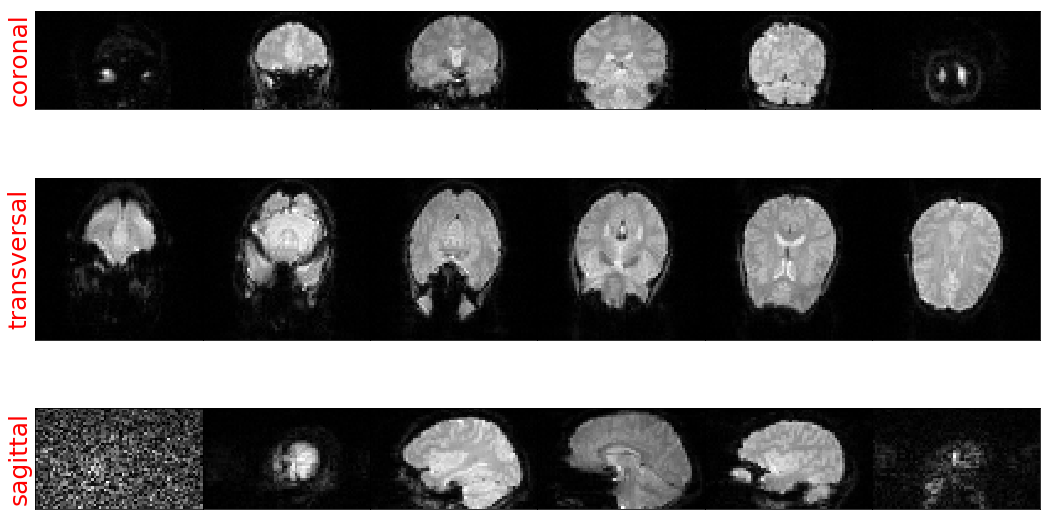

In [9]:
# Create a 3x6 subplot 
fig, ax = plt.subplots(3, 6, figsize=[18, 11])

# Orgaize the data for visualisation in the coronal plane (pixel_rows, slices,pix_cols)
coronal = np.transpose(array_4D_3108, [0,2,1,3])
coronal = np.rot90(coronal, 1)

# Orgaize the data for visualisation in the transversal plane (pixel_cols, pix_rows, slices)
transversal = np.transpose(array_4D_3108, [1,0,2,3])
transversal = np.rot90(transversal, 2)

# Orgaize the data for visualisation in the sagittal plane (pixels_cols, slices, pixels_rows)
sagittal = np.transpose(array_4D_3108, [1,2,0,3])
sagittal = np.rot90(sagittal, 1)

# Plot some of the images in different planes
n = 10
for i in range(6):
    ax[0][i].imshow(coronal[:, :, n, 0], cmap='gray')
    ax[0][i].set_xticks([])
    ax[0][i].set_yticks([])
    if i == 0:
        ax[0][i].set_ylabel('coronal', fontsize=25, color='r')
    n += 10
    
n = 5
for i in range(6):
    ax[1][i].imshow(transversal[:, :, n, 0], cmap='gray')
    ax[1][i].set_xticks([])
    ax[1][i].set_yticks([])
    if i == 0:
        ax[1][i].set_ylabel('transversal', fontsize=25, color='r')
    n += 4
    
n = 5
for i in range(6):
    ax[2][i].imshow(sagittal[:, :, n, 0], cmap='gray')
    ax[2][i].set_xticks([])
    ax[2][i].set_yticks([])
    if i == 0:
        ax[2][i].set_ylabel('sagittal', fontsize=25, color='r')
    n += 10

fig.subplots_adjust(wspace=0, hspace=0)
plt.show()

#### additionnal graph from nibabel for one time-point - to modify. 

import matplotlib.pyplot as plt
def show_slices(slices):
    """ Function to display row of image slices """
    fig, axes = plt.subplots(1, len(slices))
    for i, slice in enumerate(slices):
        axes[i].imshow(slice.T, cmap="gray", origin="lower")

slice_0 = epi_img_data[26, :, :]
slice_1 = epi_img_data[:, 30, :]
slice_2 = epi_img_data[:, :, 16]
show_slices([slice_0, slice_1, slice_2])
plt.suptitle("Center slices for EPI image")  

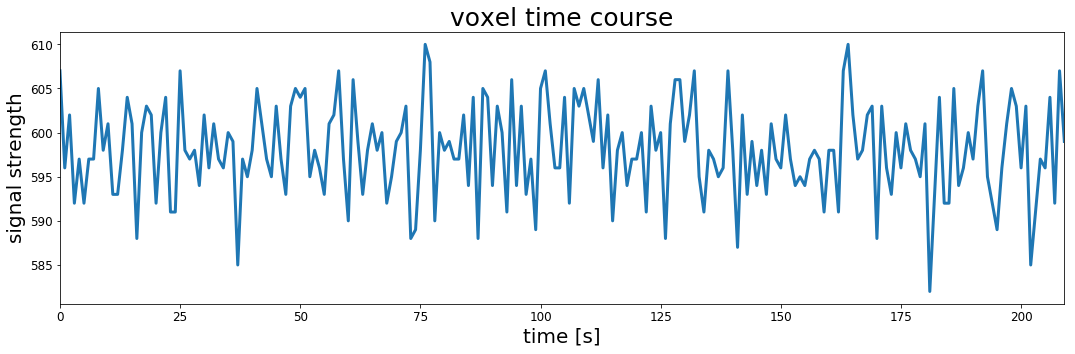

In [11]:
# Create an empty plot with defined aspect ratio
fig, ax = plt.subplots(1, 1, figsize=[18, 5])

# Plot the timecourse of a random voxel
ax.plot(transversal[30, 30, 35, :], lw=3)
ax.set_xlim([0, transversal.shape[3]-1])
ax.set_xlabel('time [s]', fontsize=20)
ax.set_ylabel('signal strength', fontsize=20)
ax.set_title('voxel time course', fontsize=25)
ax.tick_params(labelsize=12)

plt.show()

## III. DICOM format with Pydicom

### 2. fMRI metadata

In [12]:
PathDicom =DCM3108
lstFilesDCM = []  # create an empty list
for dirName, subdirList, fileList in os.walk(PathDicom):
    for filename in fileList:
        if ".dcm" in filename.lower():  # check whether the file's DICOM
            lstFilesDCM.append(os.path.join(dirName,filename))

# Get ref file
RefDs = pydicom.read_file(lstFilesDCM[0])

# Load dimensions based on the number of rows, columns, and slices (along the Z axis)
ConstPixelDims = (int(RefDs.Rows), int(RefDs.Columns), len(lstFilesDCM))

# Load spacing values (in mm)
ConstPixelSpacing = (float(RefDs.PixelSpacing[0]), float(RefDs.PixelSpacing[1]), float(RefDs.SliceThickness))

print(ConstPixelDims, ConstPixelSpacing)

x = np.arange(0.0, (ConstPixelDims[0])*ConstPixelSpacing[0], ConstPixelSpacing[0])
y = np.arange(0.0, (ConstPixelDims[1])*ConstPixelSpacing[1], ConstPixelSpacing[1])
z = np.arange(0.0, (ConstPixelDims[2])*ConstPixelSpacing[2], ConstPixelSpacing[2])

# The array is sized based on 'ConstPixelDims'
ArrayDicom = np.zeros(ConstPixelDims, dtype=RefDs.pixel_array.dtype)
# loop through all the DICOM files
for filenameDCM in lstFilesDCM:
    # read the file
    ds = pydicom.read_file(filenameDCM)
    # store the raw image data
    ArrayDicom[:, :, lstFilesDCM.index(filenameDCM)] = ds.pixel_array

(462, 476, 210) (3.2941176891327, 3.2941176891327, 3.2999999523163)


In [ ]:
#print(RefDs.InstanceNumber)
print(RefDs.AcquisitionNumber)
print(RefDs.AcquisitionMatrix)
print(RefDs.AcquisitionTime)
print(RefDs.)

In [ ]:
print(ArrayDicom[0])

### Plot of one time-serie (=volume) of #3108

(462, 476)
((462, 476), (462, 476))


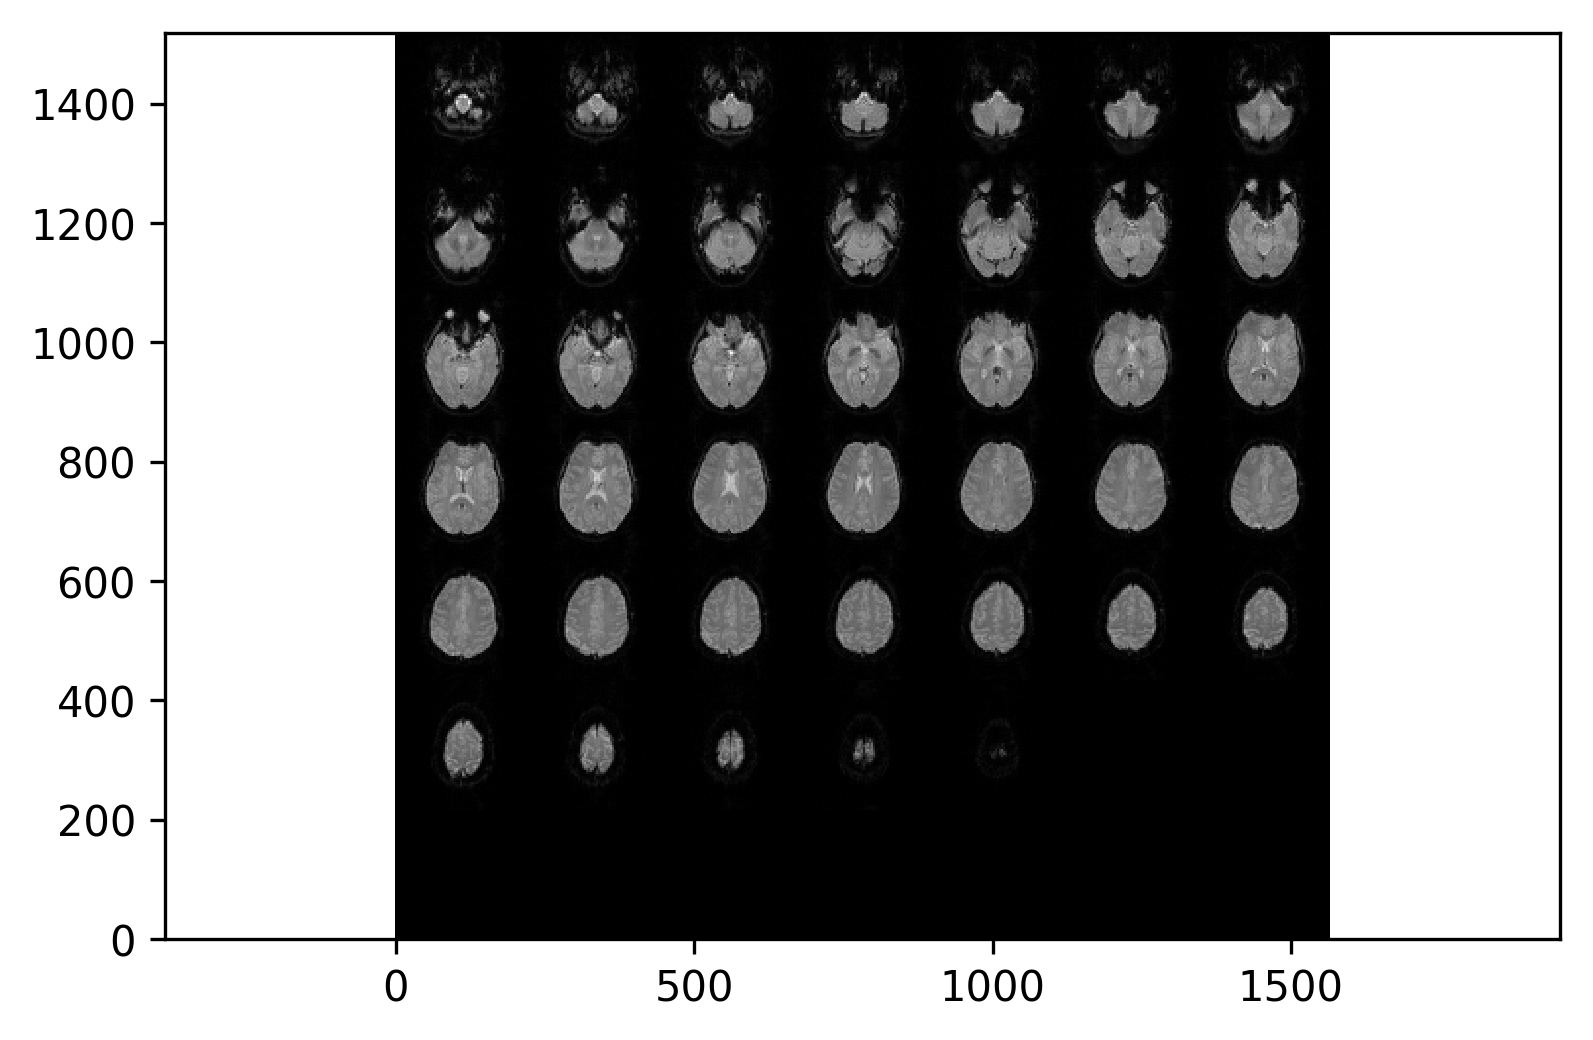

In [13]:
plt.figure(dpi=300)
plt.axes().set_aspect('equal', 'datalim')
plt.set_cmap(plt.gray())
X, Y = np.meshgrid(y, x)
array=np.flipud(ArrayDicom[:, :, 80])
print(array.shape),print((X.shape,Y.shape))
plt.pcolormesh(X,Y,array)

(462, 476)
((462, 476), (462, 476))


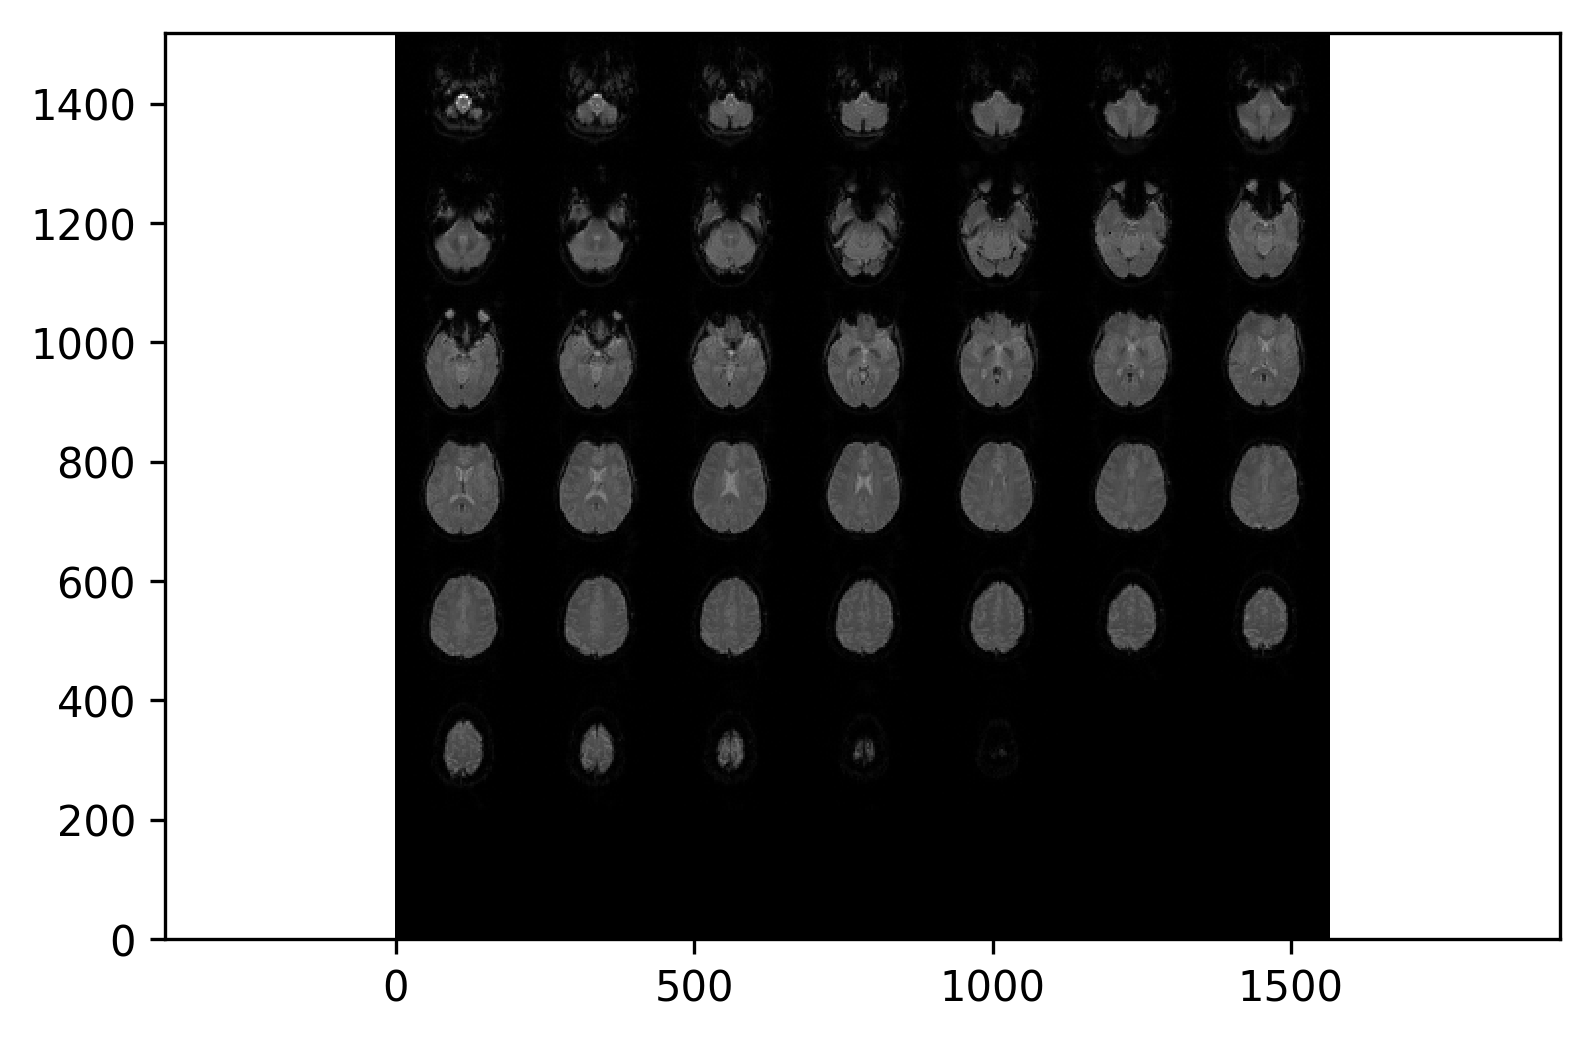

In [14]:
plt.figure(dpi=300)
plt.axes().set_aspect('equal', 'datalim')
plt.set_cmap(plt.gray())
X, Y = np.meshgrid(y, x)
array=np.flipud(ArrayDicom[:, :, 50])
print(array.shape),print((X.shape,Y.shape))
plt.pcolormesh(X,Y,array)

(462, 476)
((462, 476), (462, 476))


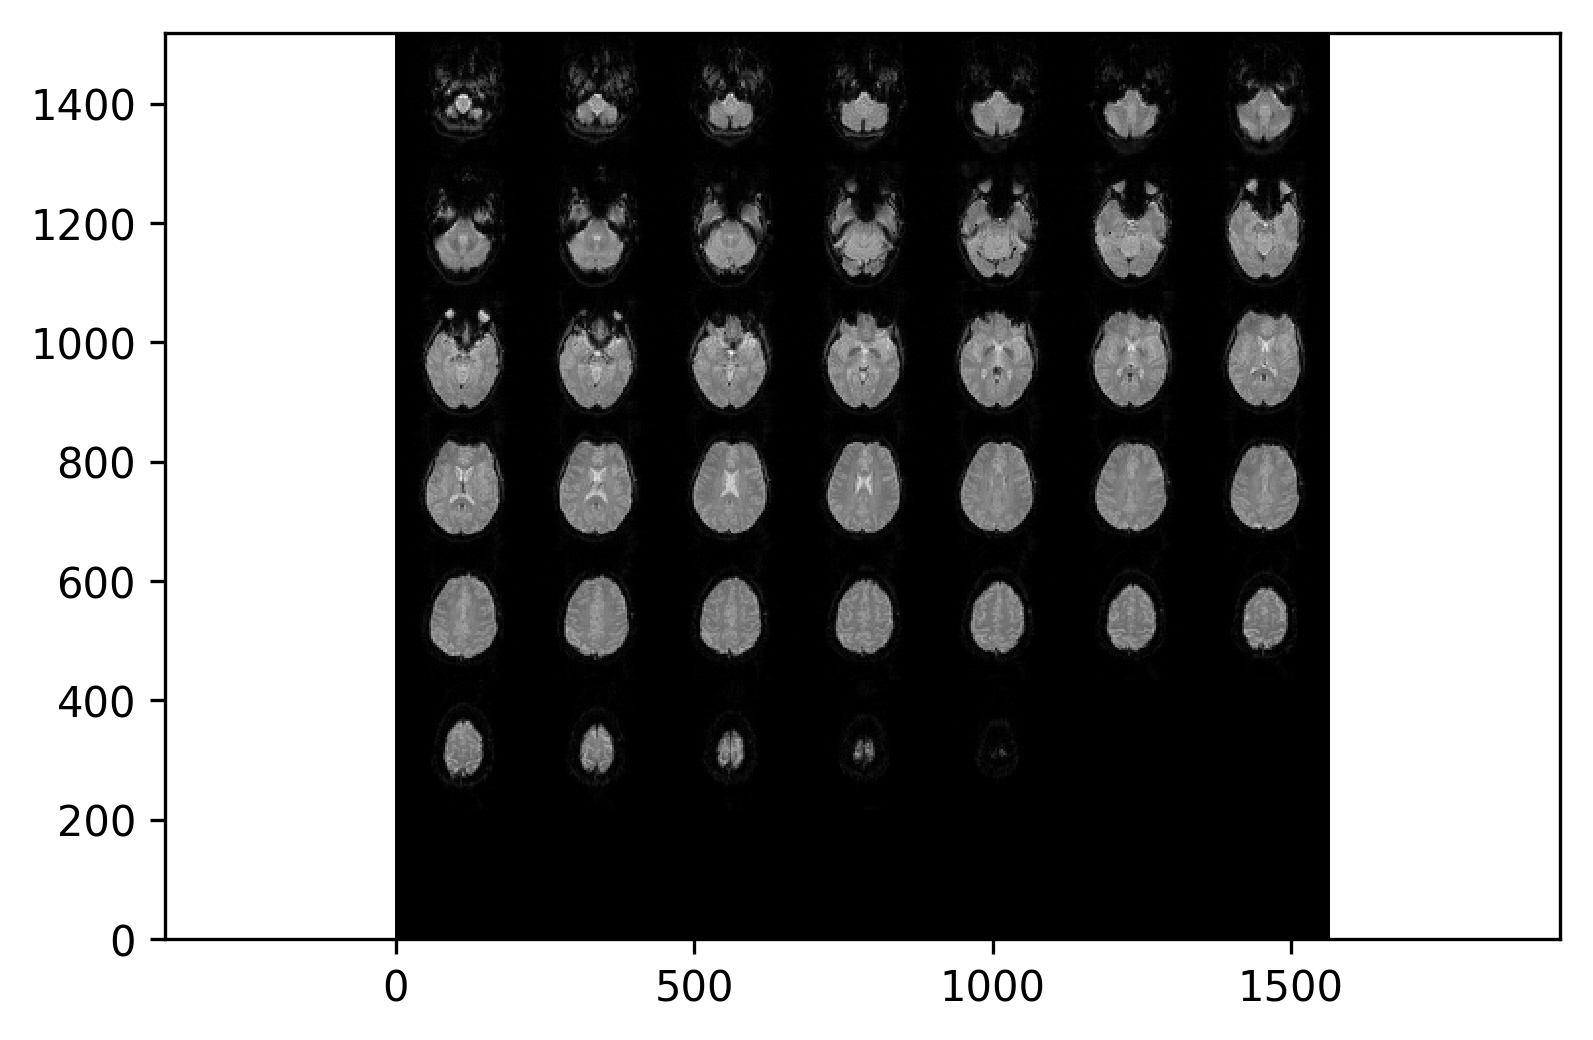

In [15]:
plt.figure(dpi=300)
plt.axes().set_aspect('equal', 'datalim')
plt.set_cmap(plt.gray())
X, Y = np.meshgrid(y, x)
array=np.flipud(ArrayDicom[:, :, 100])
print(array.shape),print((X.shape,Y.shape))
plt.pcolormesh(X,Y,array)

(462, 476)
((462, 476), (462, 476))


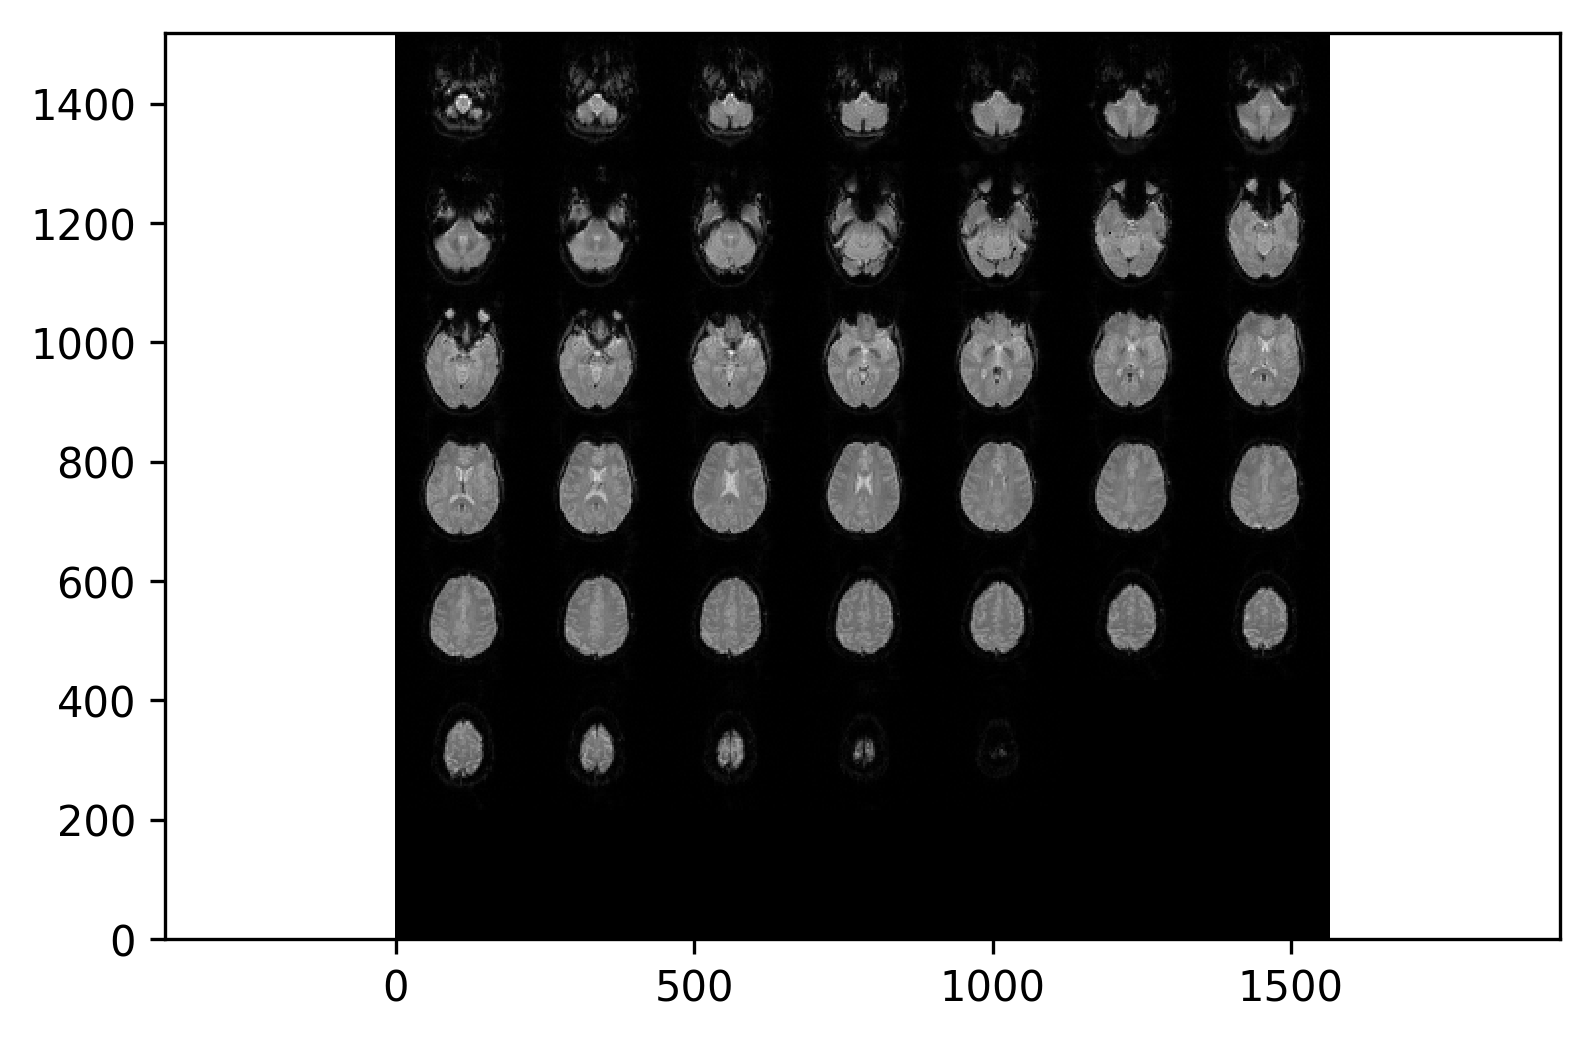

In [17]:
plt.figure(dpi=300)
plt.axes().set_aspect('equal', 'datalim')
plt.set_cmap(plt.gray())
X, Y = np.meshgrid(y, x)
array=np.flipud(ArrayDicom[:, :, 150])
print(array.shape),print((X.shape,Y.shape))
plt.pcolormesh(X,Y,array)

(462, 476)
((462, 476), (462, 476))


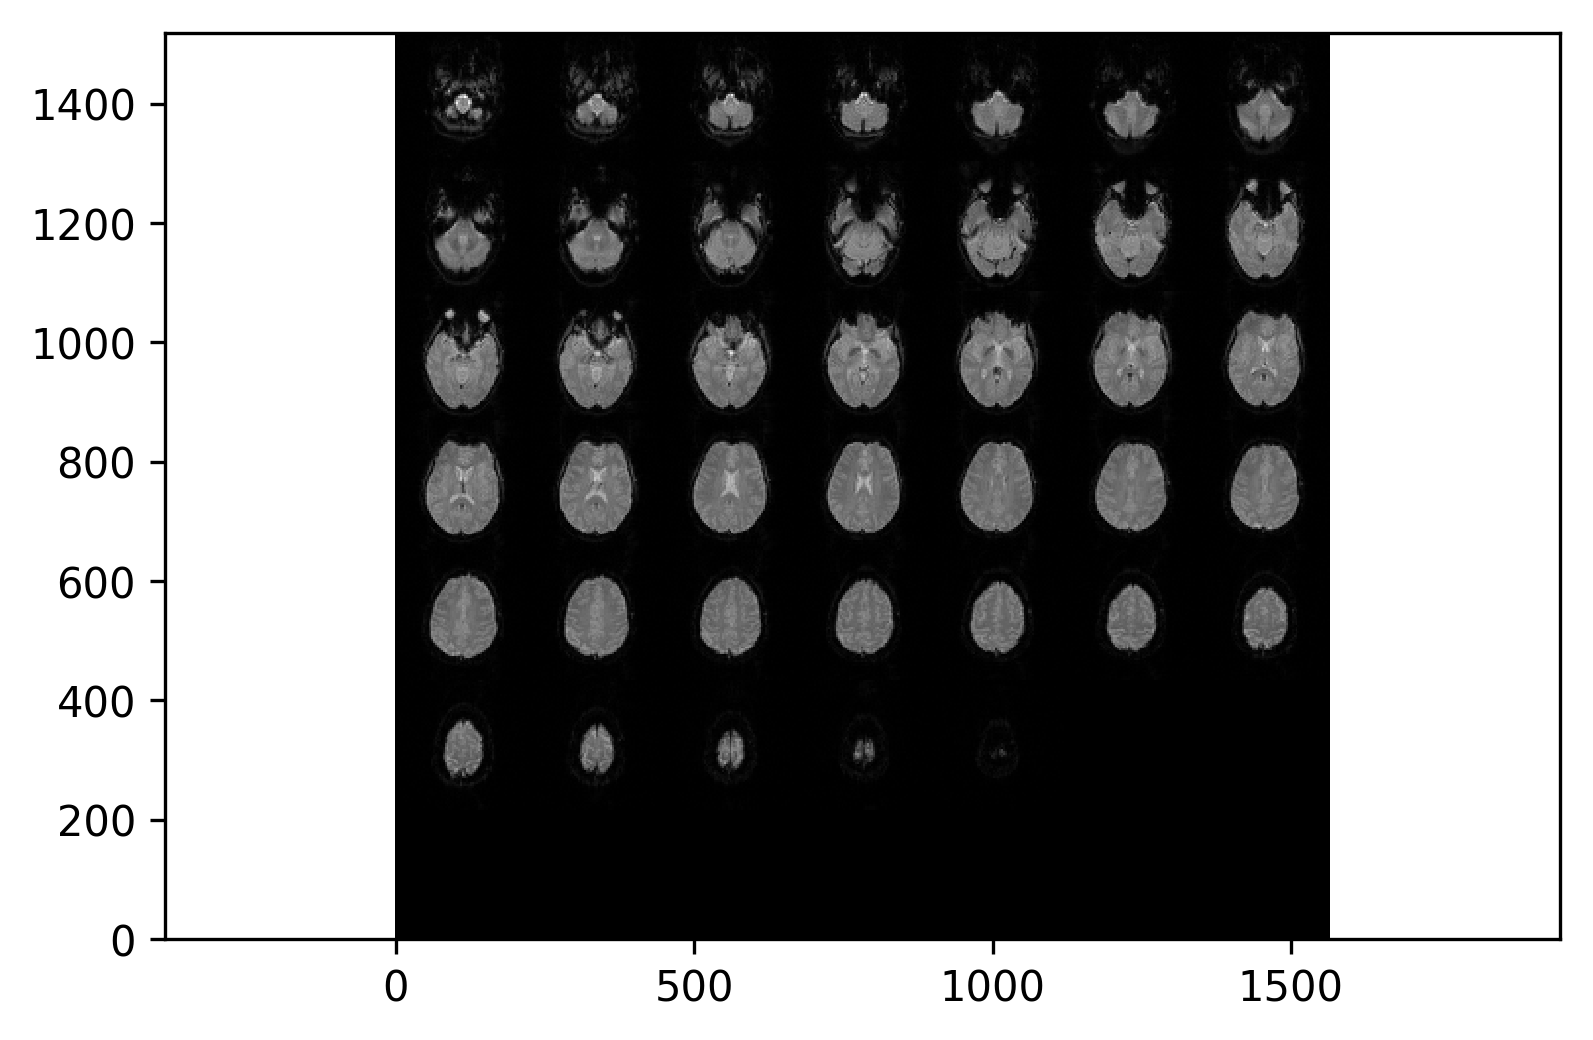

In [18]:
plt.figure(dpi=300)
plt.axes().set_aspect('equal', 'datalim')
plt.set_cmap(plt.gray())
X, Y = np.meshgrid(y, x)
array=np.flipud(ArrayDicom[:, :, 200])
print(array.shape),print((X.shape,Y.shape))
plt.pcolormesh(X,Y,array)